# Calcul approché des probabilités par simulation

In [8]:
import itertools
import random

## 1 Introduction

Exemple :

On s’intéresse à l’expérience aléatoire suivante : « jet de deux dés non pipés ». On veut déterminer la probabilité de l’événement

: « obtenir un double, ou deux entiers consécutifs ».

Nous allons simuler l’expérience aléatoire sous la forme d’un fonction :

In [9]:
import random
def jet2d():
    de1 = random.choice([1,2,3,4,5,6])
    de2 = random.choice([1,2,3,4,5,6])
    return (de1,de2)
realisation = jet2d()
print(realisation)

(6, 6)


La réalisation de l’expérience est-elle favorable à l’événement ? On peut écrire une fonction pour tester la réalisation et répondre à cette question :

In [5]:
def testA(des):
    d1 = des[0]
    d2 = des[1]
    res = (d1 == d2 or d2 == d1 + 1 or d1 == d2+1)
    return res

resTest = testA(realisation)

print(resTest)

True


On peut alors répéter cette procédure « expérience + test » un grand nombre de fois et calculer la proportion de réalisations favorables à :

In [6]:
compteur = 0
for i in range(1000):
    res = testA(jet2d())
    if res == True :
    compteur += 1
print("Estimation de la probabilité : {}".format(compteur/1000))

Estimation de la probabilité : 0.453


## 2 Exercices pratiques

### 2.1 Travaux préliminaires

In [20]:
def simulrepExemple(n: int) -> float:
    return sum([1 for _ in range(n) if testA(jet2d())]) / n

In [21]:
print(simulrepExemple(10))
print(simulrepExemple(100))
print(simulrepExemple(1000))
print(simulrepExemple(10000))

0.4
0.39
0.447
0.448


In [27]:
def convergence(n: int) -> list:
    return [simulrepExemple(i) for i in range(1, n+1)]

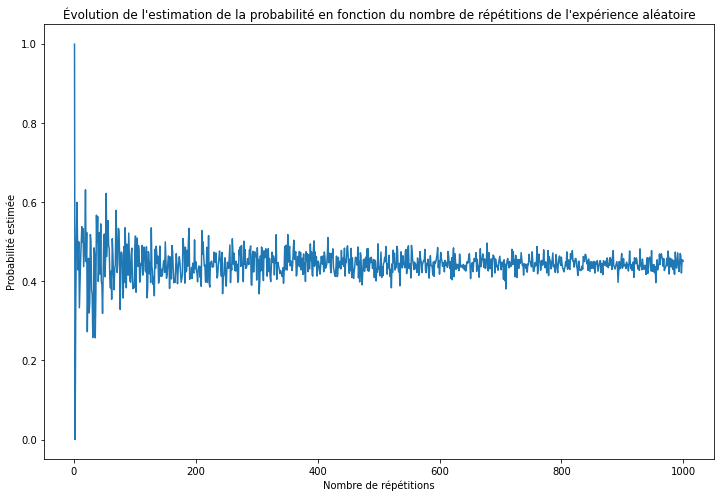

In [32]:
import matplotlib.pyplot as plt
N = 1000
x = list(range(1,N+1))
y = convergence(N)
plt.figure(figsize=(12,8))
plt.plot(x,y)
plt.xlabel("Nombre de répétitions")
plt.ylabel("Probabilité estimée")
plt.title("Évolution de l'estimation de la probabilité en fonction du nombre de répétitions de l'expérience aléatoire")
plt.show()

### 2.2 Chapeaux dérangés

Reprendre l’exercice des chapeaux dérangés et écrire une fonction chapeauchapeau(n, nrep) qui estime la probabilité par simulation, cette fois (avec nrep répétitions de l’expérience).

In [33]:
def chapeaux(n: int):
    issues = list(itertools.permutations([i for i in range(n)]))
    return sum(1 for issue in issues if all(issue[i] != i for i in range(n))) / len(issues)

In [67]:
def chapeauchapeau(n, nrep):
    return sum(1 for i in range(nrep) if all(random.sample([j for j in range(n)], n)[k] != k for k in range(n))) / nrep

In [68]:
print(chapeauchapeau(6, 10000))

0.3391


### 2.3 Jeu de dés

On dispose de quatre dés équilibrés à 120 faces. On les lance.

Quelle est la probabilité d’obtenir :

- au moins un multiple de 21 ou au moins deux multiples de 9 ?
- exactement deux paires ?


In [ ]:
#issues = list(itertools.product(list(range(1, 121)), repeat=4))

In [74]:
def exercice_2_3_1(n=10000):
    res = 0
    for _ in range(n):
        tirage = sorted(random.choices(range(1, 121), k=4))
        multiples_21 = sum(1 for x in tirage if x % 21 == 0)
        multiples_9 = sum(1 for x in tirage if x % 9 == 0)  
        res += multiples_21 >= 1 or multiples_9 >= 2
    return res / n

In [75]:
exercice_2_3_1()

0.2016

On peut estimer qu'il y a 1 chance sur 5 d'avoir au moins un multiple de 21 ou au moins deux multiples de 9

In [98]:
def exercice_2_3_2(n=10000):
    res = 0
    for _ in range(n):
        tirage = sorted(random.choices(range(1, 121), k=4))
        res += sum(1 for x in tirage if x % 2 == 0) == 2
    return res / n

In [99]:
exercice_2_3_2()

0.3732

### 2.4 « Paradoxe » des anniversaires

In [129]:
def tirage(n):
    return random.choices(range(1, 366), k=n)

In [130]:
def test(x):
    for i in range(len(x)):
        for j in range(i+1, len(x)-1):
            if x[i] == x[j]:
                return True
    return False

In [131]:
def probA(n, nrep):
    return sum(test(tirage(n)) for _ in range(nrep)) / nrep
        

In [142]:
probA(10,1000)

0.087

In [147]:
n = 2
p = 0
while p < 0.5:
    p = probA(n, 1000)
    print(f"{n:<3}{p}")
    n += 1

2  0.0
3  0.005
4  0.006
5  0.022
6  0.025
7  0.048
8  0.052
9  0.071
10 0.089
11 0.125
12 0.133
13 0.153
14 0.2
15 0.215
16 0.246
17 0.263
18 0.333
19 0.346
20 0.36
21 0.393
22 0.468
23 0.447
24 0.509


### 2.5 Estimation de π

On considère l’expérience aléatoire suivante : on prend aléatoirement un point dans un carré de côté 2 (unités quelconques). On considère alors l’événement « le point est dans le cercle inscrit dans le carré ».

- Quelle est la probabilité de  A ?
- Déterminer cette probabilité par simulation.
- En déduire une estimation de π.

La probabilité que cela arrive correspond au rapport entre la surface du disque de diamètre 2 et celle du carré de côté 2.

$$\frac{1^2 \pi}{2 \times 2} = \frac{\pi}{4} \approx 0,7854$$

Afin de vérifier cela expérimentalement, nous allons générer aléatoirement un point dans le carré et vérifier si sa distance au centre est inférieure ou égale à 2 (donc qu'il est compris dans le cercle). On peut ensuite répéter cette expérience un grand nombre de fois et regarder le taux de réssite. Ce taux multiplié par 4 va nous donner une valeur approchée de π.

In [148]:
def random_point():
    return (random.random()*2, random.random()*2)

In [153]:
import math
def distance(a, b):
    return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

In [202]:
def simulate_A(n=10000):
    return sum(distance((0, 0), random_point()) <= 2 for _ in range(n)) / n

In [217]:
print(f"Taux de points dans le cercle : {simulate_A():16}\nEstimation de π : {simulate_A()*4:>30}")

Taux de points dans le cercle :           0.7907
Estimation de π :                         3.1172


### 2.6 Série noire (Bonus)

In [19]:
def simuler_serie_noire(n):
    series_noires = 0
    for _ in range(n):
        accidents = 0
        for _ in range(22):
            if random.random() < 0.1:  
                accidents += 1
        if accidents >= 5: 
            series_noires += 1
    
    return series_noires / n

print(f"Probabilité estimée d'avoir une série noire : {simuler_serie_noire(10000):.10f}")


Probabilité estimée d'avoir une série noire : 0.0599000000
